## Исследование данных о российском кинопрокате



Описание проекта  

Заказчик этого исследования — Министерство культуры Российской Федерации.   
Вам нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделите внимание фильмам, которые получили государственную поддержку. Попробуйте ответить на вопрос, насколько такие фильмы интересны зрителю.   
Вы будете работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.   

Инструкция по выполнению  

Шаг 1. Откройте файлы с данными и объедините их в один датафрейм
Объедините данные таким образом, чтобы все объекты из датасета mkrf_movies обязательно вошли в получившийся датафрейм. 

Шаг 2. Предобработка данных  

Проверьте типы данных в датафрейме и преобразуйте там, где это необходимо.
Изучите пропуски в датафрейме. Объясните, почему заполнили пропуски определённым образом или почему не стали это делать.  
Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.
Изучите столбцы, которые содержат категориальные значения:  
Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;  
Исправьте проблемные значения в поле type.  
Изучите столбцы, которые хранят количественные значения. Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?  

Добавьте новые столбцы:  

Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма;
Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно;  
Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.  

Шаг 3. Проведите исследовательский анализ данных  

Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.  
Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?  
С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года. Сравните значения и сделайте выводы.  
Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.  

Шаг 4. Исследуйте фильмы, которые получили государственную поддержку  

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.   

Шаг 5. Напишите общий вывод  

Описание данных

first_column — содержание столбца 1 :    

title — название фильма;  
puNumber — номер прокатного удостоверения;  
show_start_date — дата премьеры фильма;  
type — тип фильма;  
film_studio — студия-производитель;  
production_country — страна-производитель;  
director — режиссёр;  
producer — продюсер;  
age_restriction — возрастная категория;  
refundable_support — объём возвратных средств государственной поддержки;  
nonrefundable_support — объём невозвратных средств государственной поддержки;  
financing_source — источник государственного финансирования;  
budget — общий бюджет фильма;  
ratings — рейтинг фильма на КиноПоиске;  
genres — жанр фильма.  

second_column — содержание столбца 2:  

puNumber — номер прокатного удостоверения;  
box_office — сборы в рублях.  

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Импортируем нужные библиотеки и посмотрим файлы с данными по отдельности.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
try:
    data_udo = pd.read_csv('/datasets/mkrf_movies.csv')
except:
    data_udo = pd.read_csv('C:/Users/sazon/Desktop/Задачи/YandexPracticum/cinema/mkrf_movies.csv')

In [3]:
try:
    data_pok = pd.read_csv('/datasets/mkrf_shows.csv')
except:
    data_pok = pd.read_csv('C:/Users/sazon/Desktop/Задачи/YandexPracticum/cinema/mkrf_shows.csv')

In [4]:
data_udo.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [5]:
data_pok.head()

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


Запросим атрибуты таблиц методом info()

In [6]:
data_udo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

В данных заметил следующее:  
puNumber (номер прокатного удостоверения) - должен быть тип int  
show_start_date (дата премьеры фильма) - должен быть тип datetime  
producer (продюсер) - есть нулевые значения  
refundable_support (объём возвратных средств государственной поддержки) - есть нулевые значения  
nonrefundable_support (объём невозвратных средств государственной поддержки) - есть нулевые значения  
budget (общий бюджет фильма) - есть нулевые значения  
financing_source (источник государственного финансирования) - есть нулевые значения  
ratings (рейтинг фильма на КиноПоиске) - есть нулевые значения, должен быть тип float  
genres (жанр фильма) - есть нулевые значения  



In [7]:
data_pok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


В этой таблице на первый взгляд все в порядке. 

Объединим оба датафрейма в один. Обьединять будем по столбцу puNumber, но для начала изменим тип данных в первом датафрейме.

Как оказалось, в одной из строчек стобца puNumber есть нечисловое значение 'нет', найдем его.

In [8]:
data_udo[data_udo.isin(['нет']).any(axis= 1 )]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


И поменяем значение на ноль.

In [9]:
data_udo['puNumber'] = data_udo['puNumber'].replace('нет', 0)

In [10]:
data_udo['puNumber'] = data_udo['puNumber'].astype(int)

In [11]:
data = data_udo.merge(data_pok,on='puNumber', how='left')

Посмотрим на обновленный датафрейм

In [12]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int32  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

Выше мы определили, где нужно заменить тип данных, пора действовать

In [14]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S.%fZ')


При попытке поменять тип данных в столбце ratings, появляется ошибка, как выяснилось, в этом столбце  
по мимо записи рейтинга от 0-9, записаны еще в процентах, попробуем найти эти строки(честно это я нагуглил и немного не понимаю как это работает, очень хотел бы увидеть ваше решение)

In [15]:
invalid_raitings = data[data['ratings'].str.contains('[^0-9.]').fillna(False)]

In [16]:
data.loc[invalid_raitings.index, 'ratings'] = invalid_raitings['ratings'].str[0] + '.' + invalid_raitings['ratings'].str[1]

data['ratings'] = pd.to_numeric(data['ratings'])

data['ratings'].describe()[['min', 'max']]


min    1.0
max    9.9
Name: ratings, dtype: float64

In [17]:
data['ratings'] = data['ratings'].astype(float)

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

Посмотрим количество пропусков в каждом столбце

In [18]:
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

Посмотрим на пропуски в стобце film_studio

In [19]:
data.loc[data['film_studio'].isna(), 'title']

1293                             Stars in Shorts
4441                    Мульт личности. Выпуск 5
6105                                Значит любит
6181                       Несейка. Младшая дочь
6379                                Ян Антонышев
6380                                Ян Антонышев
6399                       Доживем до каникул?..
6485                                  До и После
6494              Калмыцкий геше Нгаванг Вангьял
6497                          Мой папа Чингисхан
6498                         В плену города грёз
6499                              Последнее фото
6507                                Мой селфхарм
6511              Обстоятельства места и времени
6638    Эрик Булатов. Моя Третьяковка, серии 1-2
6639                                       Брови
6662                                     Топливо
6722                         Путешествие в Париж
Name: title, dtype: object

Решил поискать студии которые снимали эти фильмы, нашел не на всех информацию, информации о студии в основном нет на документальные фильмы и короткометражки. Скорее всего сняты они были не студией, а одним человеком или несколькими. Решил заменить пропущенные значения на те что нашел, а на какие не нашел заменю на 'нет' .

In [20]:
data.loc[(data['title'] == 'Stars in Shorts'),'film_studio'] = 'Biscuit Pictures, Mission Filmworks, Contemptible Entertainment'
data.loc[(data['title'] == 'Несейка. Младшая дочь'),'film_studio'] = 'Продюсерский центр «Молодёжные инициативы»'
data.loc[(data['title'] == 'Доживем до каникул?..'),'film_studio'] = 'МАТРЕШКА Films Productions'
data.loc[(data['title'] == 'В плену города грёз'),'film_studio'] = 'Olga Michi Production'
data.loc[(data['title'] == 'Эрик Булатов. Моя Третьяковка, серии 1-2'),'film_studio'] = 'ООО «Авторское телевидение»'



In [21]:
data['film_studio']=data.loc[:, 'film_studio'].fillna('нет')

В столбцах production_country и director пропусков 2 и 9, поступим с ними также как и со студиями.


In [22]:
data['production_country']=data.loc[:, 'production_country'].fillna('нет')

In [23]:
data['director']=data.loc[:, 'director'].fillna('нет')

Продюсер не указан для 568 фильмах - заменим пропуски на "нет"

In [24]:
data['producer']=data.loc[:, 'producer'].fillna('нет')

976 фильмов остались без информации о жанре - заменим пропуски на "нет"

In [25]:
data['genres']=data.loc[:, 'genres'].fillna('нет')

ratings: для 995 фильмов рейтинги не указаны - оставим пропуски как есть.   
box_office: 4328 записей о кассовых сборах не заполнены. Вероятно, произошел сбой в выгрузке информации. Также оставим пропуски, чтобы не было искажения информации о кассовых сборах.  
Только у 5% фильмов есть информация о бюджете фильма, а также об источнике государственного финансирования и объёмах возвратных и невозвратных средств государственной поддержки. Это связано с тем, что для фильмов, которые не получали государственную поддержку, данные о бюджете не указаны. Оставим данные пропуски как есть.

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

Проверим на явные дубликаты

In [26]:
data.duplicated().sum()

0

Проверим теперь, есть ли дубликаты в столбце с номером прокатного удостоверения

In [27]:
data['puNumber'].duplicated().sum()

2

Столбец содержит всего 2 дубликата - посмотрим на них

In [28]:
data[data.duplicated(subset=['puNumber'], keep = False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


puNumber наверное должен быть уникальным. Под одним номером прокатного удостоверения числятся два разных фильма с одной датой премьеры. Возможно сыграл человеческий фактор при заполнении какой-нибудь формы. Этот номер не имеет принципиального значения, оставлю как есть.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

Удалим из столбца type лишние пробелы, которые встречаются в начале и в конце строки

In [29]:
data['type']=data['type'].str.strip()

Удалим также и из столбца production_country лишние пробелы, которые встречаются внутри строки

In [30]:
data['production_country']=data['production_country'].replace(' ','', regex=True)

Проверим на дубликаты столбец title

In [31]:
data['title'].duplicated().sum()

714

In [32]:
data[data.duplicated(subset=['title'], keep = False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
12,Малышка на миллион /По мотивам рассказов Ф.Х.Т...,221011415,2015-04-03 12:00:00,Художественный,"Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо...",США,Клинт Иствуд,"Клинт Иствуд, Том Розенберг, Альберт С.Рудди, ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8.1,"драма,спорт",NaN
26,Оружейный барон,221012515,2015-04-03 12:00:00,Художественный,"Вэ И Пэ Медиенфондс 3, Асендант Пикчерз, Сатур...",США-Франция-Турция,Эндрю Никкол,"Норман Голуайтли, Энди Грош, Николас Кейдж, Эн...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.7,"боевик,драма,криминал",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,Невиновен,111019319,2019-11-07 12:00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.5,"триллер,детектив,криминал",NaN
7416,"Отель ""Гранд Будапешт""",121035119,2019-12-13 12:00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия,США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.9,"комедия,приключения,детектив",NaN
7438,Зверь,121035919,2019-12-05 12:00:00,Художественный,Студио энд Нью,ЮжнаяКорея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.5,"триллер,драма",175003.51
7450,В тихом омуте,121036919,2019-12-09 12:00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"триллер,криминал,детектив",NaN


Дубликаты в этом столбце могу обьяснить следующим, один и тот же фильм могут начать показывать в разное время под разной лицензией и/или разными прокатчиками.

Посмотрим на дату премьеры фильма

In [33]:
data['show_start_date'].duplicated().sum()

5521

 Вполне реально начать показ нескольких фильмов в одну и ту же дату.

Посмотрим на студии

In [34]:
data['film_studio'].duplicated().sum()

1990

Тут дубликаты я  думаю связаны, что одна и та же студия выпускает не один фильм.

Посмотрим на режиссеров

In [35]:
data['director'].duplicated().sum()

2674

Думаю тут та же песня, один режиссер снимал несколько фильмов

Теперь продюсеры

In [36]:
data['producer'].duplicated().sum()

2136

Думаю, что продюссеры принимают участие не в одном фильме.

Посмотрим на другие столбцы с  категориальными переменными

In [37]:
data[['title', 'film_studio', 'director', 'producer', 'genres']].head()

,title,film_studio,director,producer,genres
0,Открытый простор,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс","боевик,драма,мелодрама"
1,Особо важное задание,"Киностудия ""Мосфильм""",Е.Матвеев,нет,"драма,военный"
2,Особо опасен,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит","фантастика,боевик,триллер"
3,Особо опасен,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит","фантастика,боевик,триллер"
4,Особо опасен,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит","фантастика,боевик,триллер"


Единственное, что бросается в глаза, это то что некоторые значения в категориальных переменных хранятся как списки - несколько стран, режиссеров, студий, жанров и т.д. Решением данной проблемы станет выделение первых значений из этих списков. Ниже мы это сделаем с основным режиссером и основным жанром фильма, ну а с продюссером и студией особого смысла в этом не вижу.

#### Шаг 2.5. Проверьте количественные значения

Посмотрим на количественные значения

In [38]:
data.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office
count,7.486000e+03,3.320000e+02,3.320000e+02,3.320000e+02,6519.000000,3.158000e+03
mean,1.351785e+08,1.186446e+07,4.898099e+07,1.272297e+08,6.488173,7.647870e+07
std,3.838218e+07,2.491656e+07,5.998012e+07,1.885883e+08,1.114638,2.403531e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00
25%,1.120250e+08,0.000000e+00,2.500000e+07,4.200000e+07,5.900000,8.623900e+04
50%,1.210155e+08,0.000000e+00,3.000000e+07,6.864992e+07,6.600000,2.327988e+06
75%,1.240033e+08,1.500000e+07,4.037500e+07,1.419853e+08,7.200000,2.397967e+07
max,2.310011e+08,1.800000e+08,4.000000e+08,2.305074e+09,9.900000,3.073569e+09


Посчитаем количество фильмов, в которых бюджет составляет 0 руб, несмотря на наличие nonrefundable_support

In [39]:
data[(data['nonrefundable_support'] != 0)&(data['budget']==0)]['title'].count()

16

Удалим их

In [40]:
data = data[(data['nonrefundable_support'] != 0)&(data['budget']!=0)]
data[(data['nonrefundable_support'] != 0)&(data['budget']==0)]['title'].count()

0

 Посчитаем количество фильмов, в которых кассовые сборы составляет менее 1000 руб:

In [41]:
data[data['box_office'] < 1000]['title'].count()

231

Вывод:
budget. Бюджет фильма указан только в случае, если была получена гос.поддержка. Вызывают подозрения фильмы, в которых бюджет составляет 0 руб, несмотря на наличие nonrefundable_support - количество таких фильмов 16. Вероятно, что просто забыли указать реальный бюджет фильма.
refundable_support. Получение гос.поддержки не всегда означает, что будет возвращена какая-то часть средств (т.е. объем возвратных средств гос.поддержки во многих случает составляет 0 руб). Это нормально.
nonrefundable_support. Получение гос.поддержки всегда означает наличие какого-то объёма невозвратных средств. Поэтому выглядят подозрительными 9 фильмов с гос.поддержкой, у которых объём невозвратных средств составляет 0 руб. Скорее всего, забыли указать сумму nonrefundable_support. Эти фильмы были удалены вместе с 16 записями с нулевым бюджетом.
ratings указан не для всех фильмов, но данные подозрения не вызывают.
box_office (кассовые сборы) указаны только для половины фильмов. Известно, что сумма указана в руб. Выглядят подозрительными кассовые сборы c маленькими значениями Например, у 231 фильмов сборы составили менее 1000 руб. Это выглядит, нереальным.

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [42]:
data['year'] = data['show_start_date'].dt.year

Создадим столбец с именем главного режиссера

In [43]:
df_director=data['director'].str.split(',',expand=True)
data['director_first']=df_director[0]

Создадим столбец с названием главного жанра

In [44]:
df_genres=data['genres'].str.split(',',expand=True)
data['genres_first']=df_genres[0]

Проверим результат

In [45]:
data[['director', 'director_first', 'genres', 'genres_first']].head()

,director,director_first,genres,genres_first
0,Кевин Костнер,Кевин Костнер,"боевик,драма,мелодрама",боевик
1,Е.Матвеев,Е.Матвеев,"драма,военный",драма
2,Тимур Бекмамбетов,Тимур Бекмамбетов,"фантастика,боевик,триллер",фантастика
3,Тимур Бекмамбетов,Тимур Бекмамбетов,"фантастика,боевик,триллер",фантастика
4,Тимур Бекмамбетов,Тимур Бекмамбетов,"фантастика,боевик,триллер",фантастика


Добавим в таблицу столбец total_support, в котором сумируем объем возвратных и невозвратных средств гос.поддержки

In [46]:
data['total_support']=data['refundable_support']+data['nonrefundable_support']

Добавим столбец с расчетом доли каждого вида гос.поддержки от общего бюджета фильма

In [47]:
data['%_total_support']=data['total_support']/data['budget']
data['%_refundable_support']=data['refundable_support']/data['budget']
data['%_nonrefundable_support']=data['nonrefundable_support']/data['budget']


In [48]:
mn=['budget', 'total_support', 'refundable_support', 'nonrefundable_support', '%_total_support', '%_refundable_support', '%_nonrefundable_support']
data[mn].describe()

,budget,total_support,refundable_support,nonrefundable_support,%_total_support,%_refundable_support,%_nonrefundable_support
count,3.070000e+02,3.070000e+02,3.070000e+02,3.070000e+02,307.000000,307.000000,307.000000
mean,1.333371e+08,5.977107e+07,1.041042e+07,4.936065e+07,0.519514,0.057192,0.462322
std,1.929219e+08,7.387266e+07,2.385699e+07,6.015006e+07,0.168866,0.104377,0.184470
min,1.446246e+07,3.000000e+06,0.000000e+00,3.000000e+06,0.044043,0.000000,0.024553
25%,4.551094e+07,2.510000e+07,0.000000e+00,2.500000e+07,0.375000,0.000000,0.323825
50%,7.087617e+07,3.500000e+07,0.000000e+00,3.000000e+07,0.593163,0.000000,0.476190
75%,1.482258e+08,6.000000e+07,1.000000e+07,4.000000e+07,0.657363,0.090520,0.648232
max,2.305074e+09,5.000000e+08,1.800000e+08,4.000000e+08,0.784745,0.603861,0.700000


Видим, что медианная величина бюджета фильма с гос.поддержкой составляет около 71 млн руб, в то время как средняя величина составляет 133 млн руб.Это свидетельствует о том, что есть некоторые фильмы, снятые с гос.поддержкой, с очень значительным бюджетом. Их бюджет повлиял на среднюю величину, но не затронул значение медианного бюджета.

Объем средств гос.поддержки в среднем составляет около 35 млн руб, т.е. около 49% от бюджета фильма. Причем гос.поддержка в основном представляет собой именно невозвратные средства в размере около 30 млн руб.

### Шаг 3. Проведите исследовательский анализ данных


Посмотрим в каких годах сколько фильмов выходило в кинотеатрах, с данными о сборах

In [49]:
cinema=data.groupby('year')['box_office'].count()
cinema.describe()

count     10.000000
mean     313.300000
std      174.344518
min      105.000000
25%      142.000000
50%      315.500000
75%      466.500000
max      527.000000
Name: box_office, dtype: float64

Посмотрим, сколько фильмов выходило в целом в прокат каждый год

In [50]:
films=data.groupby('year')['title'].count()
films.describe()

count     10.00000
mean     746.10000
std      160.76515
min      501.00000
25%      624.00000
50%      751.00000
75%      868.25000
max      985.00000
Name: title, dtype: float64

Посчитаем, какую долю составляют фильмы с указанной информацией о прокате.

In [51]:
cinema_inf = cinema/films*100
cinema_inf.describe()

count    10.000000
mean     42.351240
std      22.145975
min      10.659898
25%      23.490457
50%      43.769360
75%      62.341348
max      70.459082
dtype: float64

Cреднее количество фильмов в год: 746  
Cреднее количество фильмов в кинотеатрах в год: 313  
Доля фильмов с указанной информацией о прокате в кинотеатрах: 42.4%  

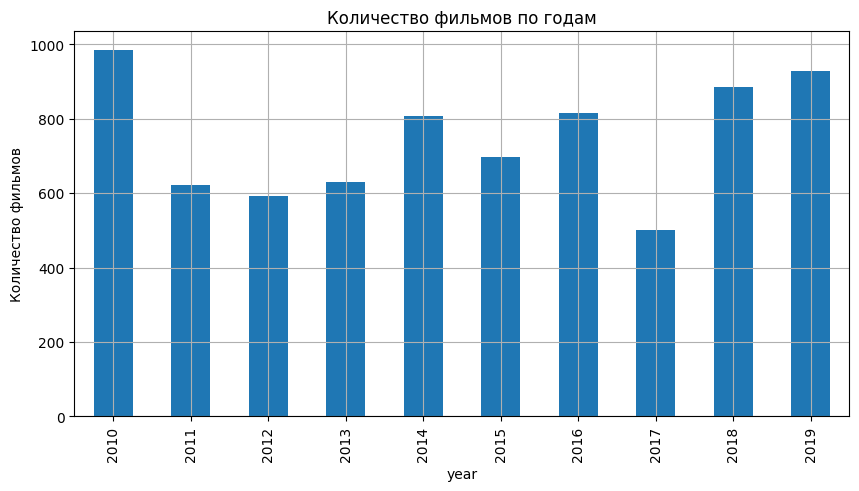

In [53]:
films.plot(x='year', kind='bar', figsize = (10, 5), grid = True, title='Количество фильмов по годам')
plt.ylabel('Количество фильмов')
plt.show()

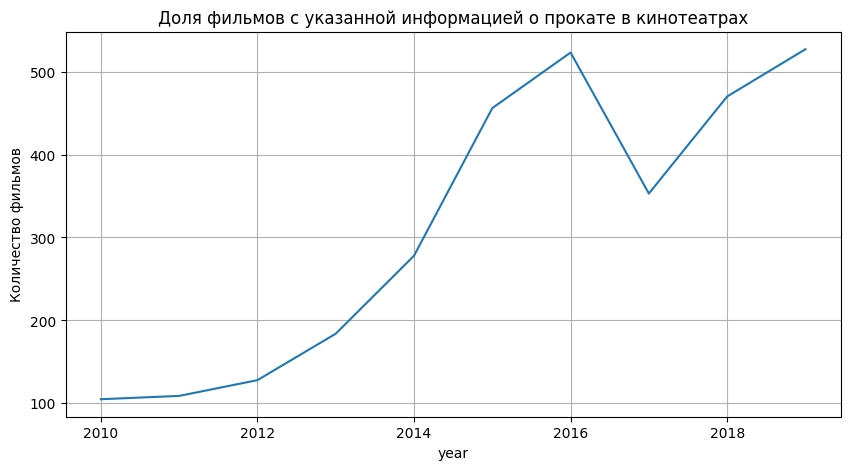

In [54]:
cinema.plot(x='year', y='cinema_inf', figsize = (10, 5), grid = True, title='Доля фильмов с указанной информацией о прокате в кинотеатрах')
plt.ylabel('Количество фильмов')
plt.show()

Данные о прокате в кинотеатрах известны не для всех фильмов.  
В среднем, в прокат в целом выходило около 746 фильмов в год, а в прокат В КИНОТЕАТРЫ выходило в 2 раза меньше - 313 фильмов в год.  


Посмотрим на величину проката за каждый год

In [55]:
rental=data.groupby('year')['box_office'].agg(['sum','count', 'mean'])
rental

,sum,count,mean
year,,,
2010,2.428654e+06,105,2.313004e+04
2011,1.410276e+07,109,1.293832e+05
2012,6.955423e+06,128,5.433924e+04
2013,2.979971e+07,184,1.619549e+05
2014,7.434718e+09,278,2.674359e+07
2015,3.842744e+10,456,8.427071e+07
2016,4.674232e+10,523,8.937345e+07
2017,4.736491e+10,353,1.341782e+08
2018,4.867462e+10,470,1.035630e+08


Построим  график, отражающий зависимость между величиной кассовых сборов и годом

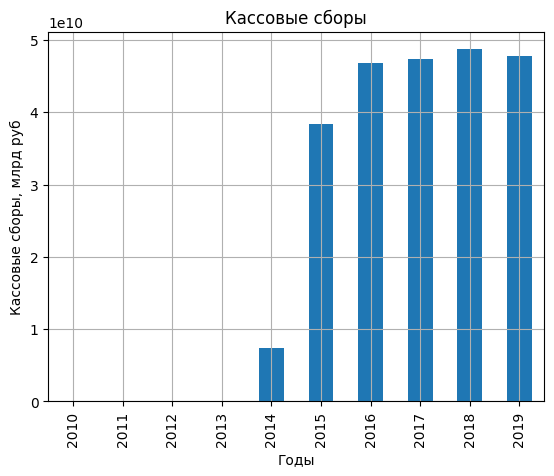

In [56]:
rental['sum'].plot(kind='bar', grid=True)
plt.title('Кассовые сборы')
plt.xlabel('Годы')
plt.ylabel('Кассовые сборы, млрд руб')
plt.show()

Видно, что с каждым годом объем кассовых сборов только увеличивается. Минимальная общая сумма кассовых сборов составила 2,4 млн руб - это было в 2010 году. А максимальная сумма составила 48.7 млрд руб - это было в 2018 году.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

              mean       median
        box_office   box_office
year                           
2010  2.313004e+04     1700.000
2011  1.293832e+05     3000.000
2012  5.433924e+04     5660.000
2013  1.619549e+05     3522.500
2014  2.674359e+07    18137.500
2015  8.427071e+07  4742671.665
2016  8.937345e+07  3776087.560
2017  1.341782e+08  9876765.000
2018  1.035630e+08  8730277.525
2019  9.055708e+07  4554745.000


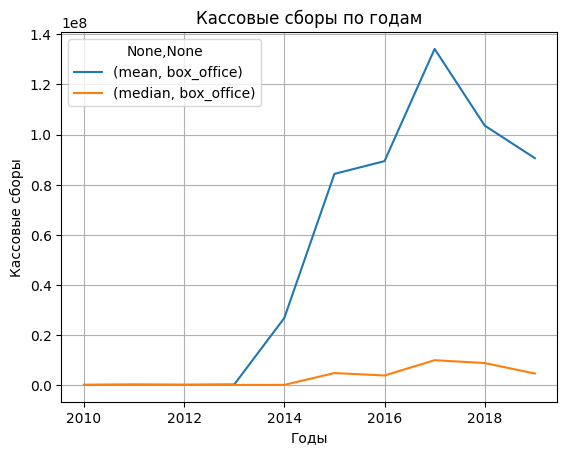

In [57]:
box_office_year=data.pivot_table(index='year', values='box_office', aggfunc=['mean', 'median'])
print(box_office_year)

box_office_year.plot(grid=True)
plt.title('Кассовые сборы по годам')
plt.xlabel('Годы')
plt.ylabel('Кассовые сборы')
plt.show()

Видим, что медиана по кассовым сборам во много раз меньше среднего каждый год. Это свидетельствует о том, что есть некоторое количество фильмов с очень значительными сборами, что повлияло на среднююю величину.

age_restriction
«0+» - для любой зрительской аудитории    8.090774e+08
«12+» - для детей старше 12 лет           5.901553e+10
«16+» - для детей старше 16 лет           7.503778e+10
«18+» - запрещено для детей               4.075766e+10
«6+» - для детей старше 6 лет             5.331283e+10
Name: box_office, dtype: float64


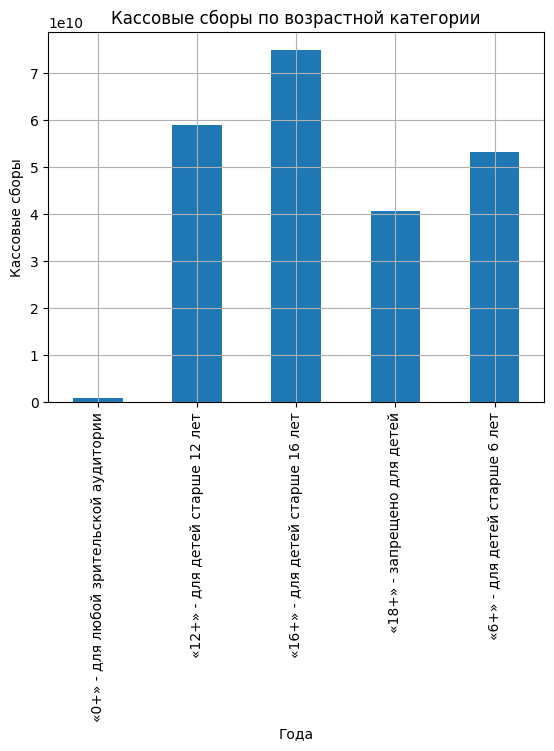

In [58]:
age_data_2014=data.query('year>2014').groupby('age_restriction')['box_office'].sum()
print(age_data_2014)

age_data_2014.plot(kind='bar', grid=True)
plt.title('Кассовые сборы по возрастной категории')
plt.xlabel('Года')
plt.ylabel('Кассовые сборы')
plt.show()

age_restriction
«0+» - для любой зрительской аудитории    3.790546e+08
«12+» - для детей старше 12 лет           1.339986e+10
«16+» - для детей старше 16 лет           1.077057e+10
«18+» - запрещено для детей               5.430351e+09
«6+» - для детей старше 6 лет             8.447618e+09
Name: box_office, dtype: float64

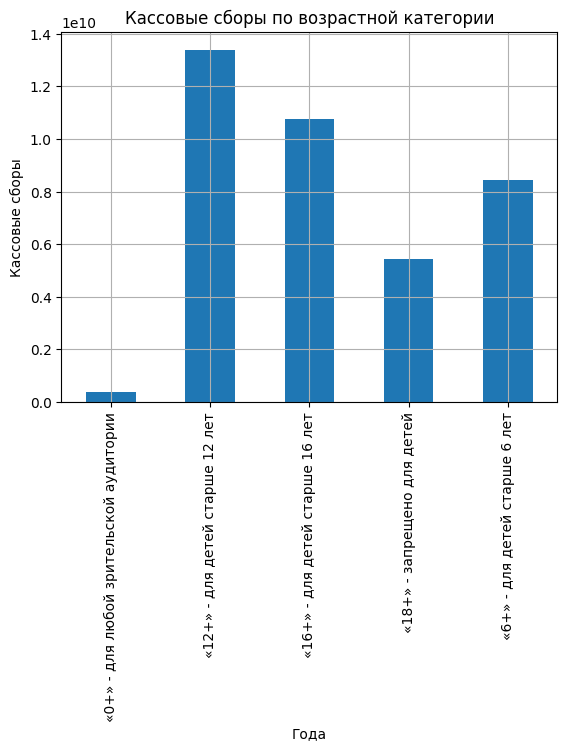

In [59]:
age_data_2015=data.query('year==2015').groupby('age_restriction')['box_office'].sum()
display(age_data_2015)

age_data_2015.plot(kind='bar', grid=True)
plt.title('Кассовые сборы по возрастной категории')
plt.xlabel('Года')
plt.ylabel('Кассовые сборы')
plt.show()

age_restriction
«0+» - для любой зрительской аудитории      150,228,848.7
«12+» - для детей старше 12 лет          11,150,762,104.0
«16+» - для детей старше 16 лет          16,594,249,489.7
«18+» - запрещено для детей               6,793,929,818.9
«6+» - для детей старше 6 лет            12,053,146,008.2
Name: box_office, dtype: float64

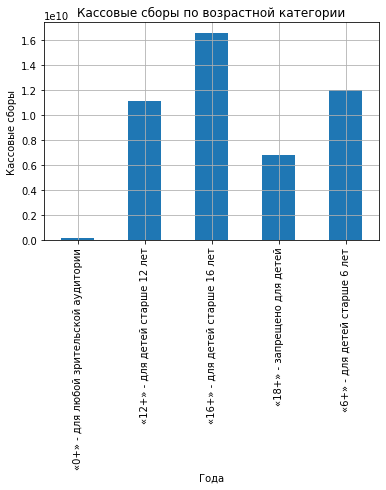

In [59]:
age_data_2016=data.query('year==2016').groupby('age_restriction')['box_office'].sum()
display(age_data_2016)

age_data_2016.plot(kind='bar', grid=True)
plt.title('Кассовые сборы по возрастной категории')
plt.xlabel('Года')
plt.ylabel('Кассовые сборы')
plt.show()

age_restriction
«0+» - для любой зрительской аудитории    2.295989e+08
«12+» - для детей старше 12 лет           7.517420e+09
«16+» - для детей старше 16 лет           1.869459e+10
«18+» - запрещено для детей               9.651496e+09
«6+» - для детей старше 6 лет             1.127181e+10
Name: box_office, dtype: float64

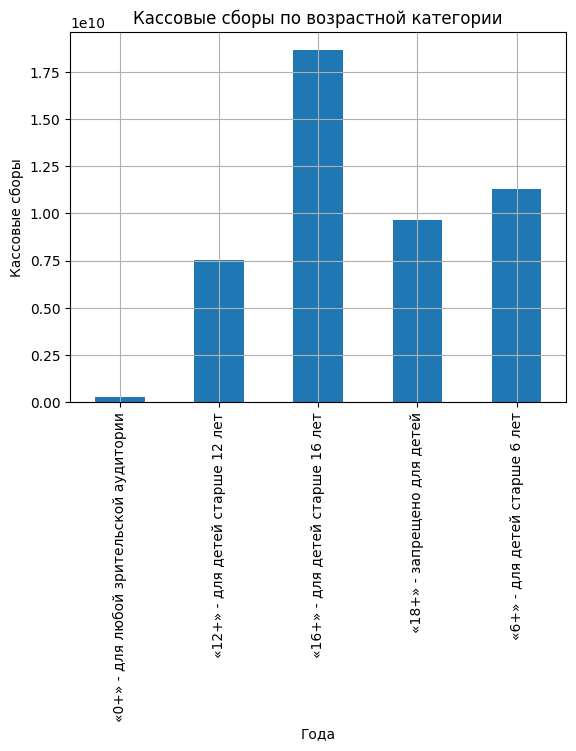

In [60]:
age_data_2017=data.query('year==2017').groupby('age_restriction')['box_office'].sum()
display(age_data_2017)

age_data_2017.plot(kind='bar', grid=True)
plt.title('Кассовые сборы по возрастной категории')
plt.xlabel('Года')
plt.ylabel('Кассовые сборы')
plt.show()

age_restriction
«0+» - для любой зрительской аудитории       32,449,002.1
«12+» - для детей старше 12 лет          14,267,291,660.7
«16+» - для детей старше 16 лет          16,278,405,946.9
«18+» - запрещено для детей               8,760,085,501.1
«6+» - для детей старше 6 лет             9,336,390,441.1
Name: box_office, dtype: float64

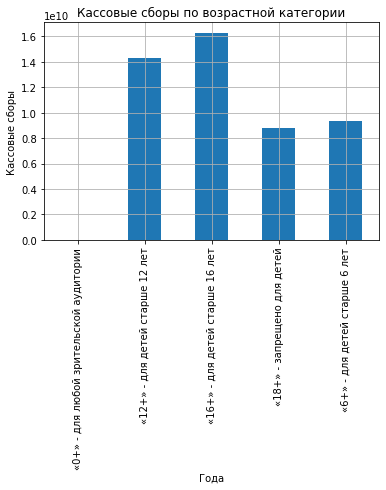

In [61]:
age_data_2018=data.query('year==2018').groupby('age_restriction')['box_office'].sum()
display(age_data_2018)

age_data_2018.plot(kind='bar', grid=True)
plt.title('Кассовые сборы по возрастной категории')
plt.xlabel('Года')
plt.ylabel('Кассовые сборы')
plt.show()

age_restriction
«0+» - для любой зрительской аудитории    1.774607e+07
«12+» - для детей старше 12 лет           1.268020e+10
«16+» - для детей старше 16 лет           1.269997e+10
«18+» - запрещено для детей               1.012180e+10
«6+» - для детей старше 6 лет             1.220387e+10
Name: box_office, dtype: float64

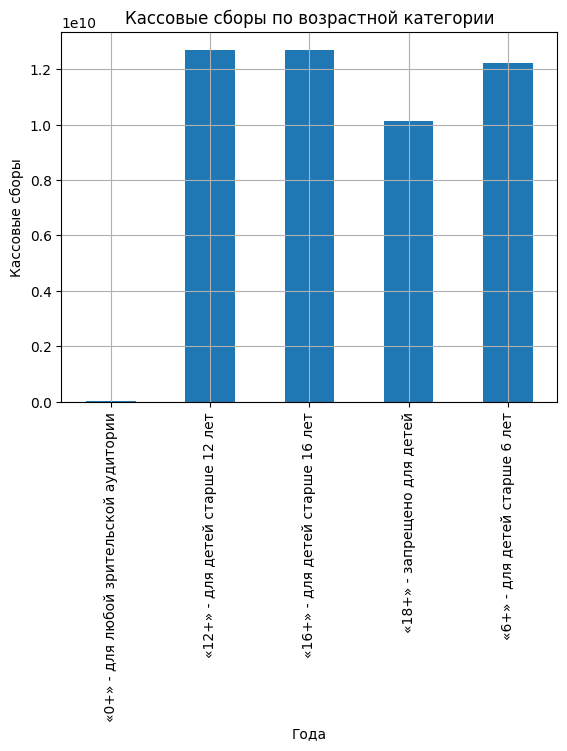

In [61]:
age_data_2019=data.query('year==2019').groupby('age_restriction')['box_office'].sum()
display(age_data_2019)

age_data_2019.plot(kind='bar', grid=True)
plt.title('Кассовые сборы по возрастной категории')
plt.xlabel('Года')
plt.ylabel('Кассовые сборы')
plt.show()

За период с 2015-2019 больше всего кассовых сборов собрали фильмы категории 16+, далее идут фильмы категорий 12+ и 6+, затем идут фильмы категории 18+, а фильмы категории 0+ принесли меньше всего выручки. Анализ кассовых сборов по годам показал следующее:  

2015: наибольшие кассовые сборы показали фильмы 12+, затем идут фильмы категории 16+ и 6+.  
2016: начиная с этого года фильмы категории 16+ будут всегда занимать первое место по кассовым сборам, затем идут фильмы 12+ и 6+ с одинаковыми показателями.  
2017: фильмы категории 12+ впервые уступили место фильмам 18+.  
2018: фильмы 12+ заняли второе место, а третье место досталось фильмам категории 6+.  
2019: почти равномерно распределились фильмы категорий 6+/12+/16+, ненамного отстают от них фильмы 18+.  
Можно утверждать, что есть некоторая закономерность между возрастной категорией и кассовыми сборами. Например, фильмы категории 0+ почти не имеют значительных сборов. Также фильмы категории 18+ пости всегда приносят меньше сборов, чем фильмы категорий 6+/12+/16+. Это, вероятно, связано с тем, что их смотрят только совершеннолетние люди, а на фильмы категорий 6+/12+/16+ родители приходят вместе с детьми, или возможно связано с тем, что основной потребитель киноиндустрии это несовершеннолетняя молодежь.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

Создадим таблицу с данными по фильмам с гос.поддержкой

In [62]:
support_data=data.query('nonrefundable_support>=0')
support_data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,ratings,genres,box_office,year,director_first,genres_first,total_support,%_total_support,%_refundable_support,%_nonrefundable_support
1281,Пока еще жива,111005313,2013-10-11 12:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,...,8.1,"драма,мелодрама",365353.6,2013,А.Атанесян,драма,26500000.0,0.333703,0.0,0.333703
1448,Бесславные придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,...,NaN,нет,28140.0,2014,А.Якимчук,нет,26000000.0,0.700000,0.0,0.700000
1498,Невидимки,111004213,2013-09-10 12:00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,...,5.3,"комедия,фантастика",19957031.5,2013,Р.Давлетьяров,комедия,107847945.0,0.612691,0.0,0.612691
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,...,4.2,драма,55917.5,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,28000000.0,0.690095,0.0,0.690095
1792,Братья Ч,111004414,2014-04-23 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,...,6.4,драма,232100.0,2014,М.Угаров,драма,25000000.0,0.624764,0.0,0.624764


In [63]:
print('Кол-во прокатных удостоверний у фильмов с гос.поддержкой:', len(support_data['puNumber']),
        ', Кол-во фильмов с гос.поддержкой:', len(support_data['title'].unique()))

Кол-во прокатных удостоверний у фильмов с гос.поддержкой: 307 , Кол-во фильмов с гос.поддержкой: 307


Создадим таблицу с данными по фильмам без гос.поддержки

In [64]:
no_support_data=data.query('nonrefundable_support.isnull() == True')
no_support_data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,ratings,genres,box_office,year,director_first,genres_first,total_support,%_total_support,%_refundable_support,%_nonrefundable_support
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,...,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик,NaN,NaN,NaN,NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,нет,«6+» - для детей старше 6 лет,NaN,...,6.6,"драма,военный",NaN,2016,Е.Матвеев,драма,NaN,NaN,NaN,NaN
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,...,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN,NaN,NaN,NaN
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,...,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN,NaN,NaN,NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,...,6.8,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика,NaN,NaN,NaN,NaN


In [65]:
print('Кол-во прокатных удостоверний у фильмов без гос.поддержки:', len(no_support_data['puNumber']),
        ', Кол-во фильмов без гос.поддержки:', len(no_support_data['title'].unique()))

Кол-во прокатных удостоверний у фильмов без гос.поддержки: 7154 , Кол-во фильмов без гос.поддержки: 6445


Посчитаем, сколько выделяется средств на поддержку кино за весь период

In [66]:
print(support_data['total_support'].describe())
print('Суммарная гос.поддержка за весь период: %.0f' % support_data['total_support'].sum())

count    3.070000e+02
mean     5.977107e+07
std      7.387266e+07
min      3.000000e+06
25%      2.510000e+07
50%      3.500000e+07
75%      6.000000e+07
max      5.000000e+08
Name: total_support, dtype: float64
Суммарная гос.поддержка за весь период: 18349718847


Посчитаем, как распределилась гос.поддержка по годам

In [67]:
support_pivot=support_data.groupby('year')['total_support'].agg(['sum','count', 'median'])
support_pivot

,sum,count,median
year,,,
2013,1.343479e+08,2,67173972.5
2014,5.490023e+08,15,28000000.0
2015,3.118241e+09,77,30000000.0
2016,3.977155e+09,58,35000000.0
2017,2.998972e+09,37,37346881.0
2018,2.983000e+09,51,35000000.0
2019,4.589000e+09,67,40000000.0


Посторим  график, отражающий зависимость между величиной гос.поддержки и годом

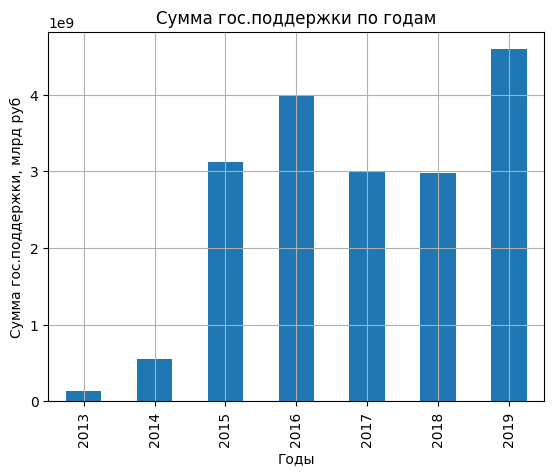

In [68]:
support_pivot['sum'].plot(kind='bar', grid=True)
plt.title('Сумма гос.поддержки по годам')
plt.xlabel('Годы')
plt.ylabel('Сумма гос.поддержки, млрд руб')
plt.show()

Построим  график, отражающий зависимость между количеством фильмов, снятых с гос.поддержкой и годом

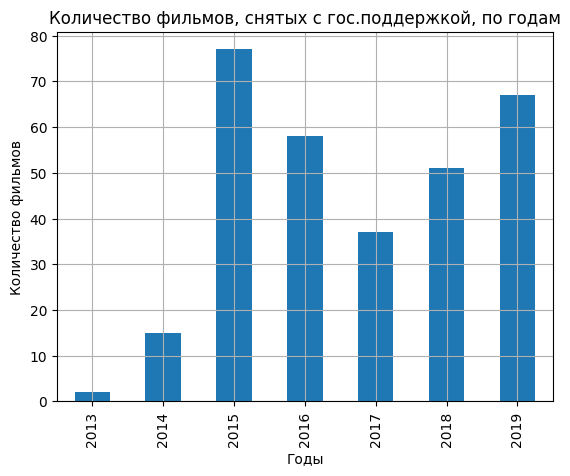

In [69]:
support_pivot['count'].plot(kind='bar', grid=True)
plt.title('Количество фильмов, снятых с гос.поддержкой, по годам')
plt.xlabel('Годы')
plt.ylabel('Количество фильмов')
plt.show()

Посчитаем, как распределились бюджеты и кассовые сборы по годам

In [70]:
net_support_pivot=support_data.groupby('year')['box_office', 'budget'].agg(['sum','count', 'median'])
net_support_pivot['result','sum']=net_support_pivot['box_office','sum'] - net_support_pivot['budget','sum']
net_support_pivot

C:\Users\sazon\AppData\Local\Temp\ipykernel_7716\840325018.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  net_support_pivot=support_data.groupby('year')['box_office', 'budget'].agg(['sum','count', 'median'])


box_office                            budget                     \
               sum count        median           sum count       median   
year                                                                      
2013  2.032239e+07     2  1.016119e+07  2.554354e+08     2  127717695.0   
2014  1.007188e+09    15  4.731240e+06  1.279485e+09    15   70876172.0   
2015  4.715365e+09    76  3.538065e+06  6.773184e+09    77   55404963.0   
2016  4.957724e+09    57  1.681433e+07  7.228943e+09    58   69655888.5   
2017  9.666281e+09    35  3.015617e+07  6.635078e+09    37   78096315.0   
2018  8.940288e+09    51  2.273024e+07  6.466194e+09    51   93000000.0   
2019  7.707502e+09    57  1.887846e+07  1.229617e+10    67   78355154.0   

            result  
               sum  
year                
2013 -2.351130e+08  
2014 -2.722966e+08  
2015 -2.057820e+09  
2016 -2.271218e+09  
2017  3.031203e+09  
2018  2.474094e+09  
2019 -4.588671e+09

Посторим  график, отражающий прибыльность фильмов с гос.поддержкой по годам

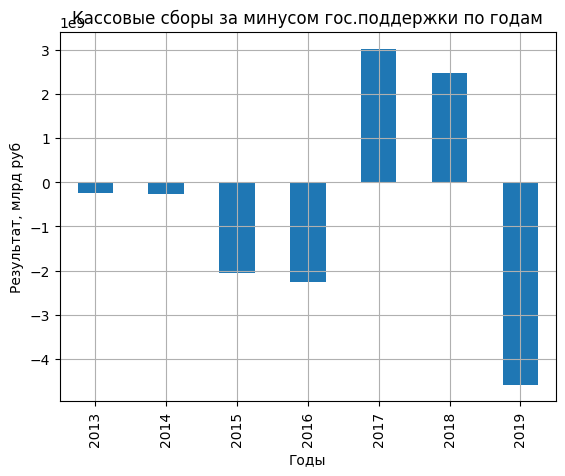

In [71]:
net_support_pivot['result','sum'].plot(kind='bar', grid=True)
plt.title('Кассовые сборы за минусом гос.поддержки по годам')
plt.xlabel('Годы')
plt.ylabel('Результат, млрд руб')
plt.show()

Выведем описание рейтинга фильмов с гос.поддержкой

In [72]:
print(support_data['ratings'].describe())

count    292.000000
mean       6.047945
std        1.155100
min        1.000000
25%        5.400000
50%        6.200000
75%        6.725000
max        9.400000
Name: ratings, dtype: float64


Выведем описание рейтинга фильмов без гос.поддержки

In [73]:
print(no_support_data['ratings'].describe())

count    6203.000000
mean        6.511978
std         1.107692
min         1.100000
25%         5.900000
50%         6.600000
75%         7.300000
max         9.900000
Name: ratings, dtype: float64


Выведем страны, где были сняты фильмы, которые получили максимальные оценки зрителей

In [74]:
data.query('ratings>8').groupby('production_country')['ratings'].count().sort_values(ascending=False).head(10)

production_country
США                      69
Россия                   62
СССР                     33
США-Великобритания       17
Великобритания           14
Франция                   7
Япония                    6
Великобритания-США        6
США-Германия              6
Россия-РеспубликаКипр     3
Name: ratings, dtype: int64

Количество фильмов, вышедших в прокат за период с 2010-2019, снятых с гос.поддержкой, составляет 332.  Всего за период с 2013-2019 была оказана гос.поддержка на сумму 18,3 млрд руб. Медианное значение гос.поддержки одного фильма за весь период с 2013-2019 составляет 35 млн руб. Однако среднее значение составляет 59 млн руб. На среднее значение повлияли значительные суммыгос.поддержки некоторых фильмов (максимальная сумма гос.поддержки составила 500 млн руб). Минимальное значение гос.поддержки составило 3 млн руб.  
Меньше всего фильмов с гос.поддержкой вышло в прокат в 2013 году (2 фильма). В 2014 году вышло 15 фильмов, а в 2015 году вышло больше всего фильмов с гос.поддержкой за весь рассматриваемый период (77 фильмов).  
Максимальный объем гос.поддержки был предоставлен не в 2015 году (когда было выпущено максимальное количество фильмов с гос.поддержкой), а в 2019 году – 4,9 млрд руб;
на втором месте по объему гос.поддержки за год занимает 2016 – 3.98 млрд руб.  
Медианное значение рейтинга по фильмам с гос.поддержкой составляет 6,2, что на 0,4 меньше рейтинга фильмов без гос.поддержки. Таким образом, можно сделать вывод о том, что фильмы, снятые без участия государства, пользуются большей любовью у зрителей, чем фильмы, снятые с гом.поддержкой.




### Шаг 5. Напишите общий вывод

Перед нами была поставлена задача изучить рынок российского кинопроката и выявить текущие тренды. Мы получили данные о прокатных удостоверениях, сборах и государственной поддержке фильмов и сделали следующие выводы:  
В среднем, в прокат выходило около 746 фильмов в год. Меньше всего фильмов вышло в прокат в 2017 году, больше всего фильмов вышло в 2010 году.

КАССОВЫЕ СБОРЫ  

Ежегодно объем кассовых сборов растет – это связано прежде всего с ростом средней величины кассовых сборов по фильмам. Минимальная общая сумма кассовых сборов составила 2,4 млн руб - это было в 2010 году. А максимальная сумма составила 48.7 млрд руб - это было в 2018 году.  

ВОЗРАСТНОЕ ОГРАНИЧЕНИЕ  

Наблюдается некоторая закономерность между возрастной категорией и кассовыми сборами. Например, фильмы категории 0+ почти не имеют значительных сборов. Также фильмы категории 18+ почти всегда приносят меньше сборов, чем фильмы категорий 6+/12+/16+. Это, вероятно, связано с тем, что их смотрят только совершеннолетние люди, а на фильмы категорий 6+/12+/16+ родители приходят вместе с детьми, или возможно связано с тем, что основной потребитель киноиндустрии представляет собой несовершеннолетнюю молодежь.  

Фильмы, получившие максимальные оценки зрителей были сняты в основном в США, России, СССР, Великобретании и Франции.  

ФИЛЬМЫ С ГОС.ПОДДЕРЖКОЙ  

Количество фильмов, снятых с участием государства составляет около 4.8% от всех фильмов, выпущенных в прокат за весь рассматриваемый период. Количество фильмов, вышедших в прокат за период с 2010-2019, снятых с гос.поддержкой, составляет 307. Всего за период с 2013-2019 была оказана гос.поддержка на сумму 18.3 млрд руб. Медианное значение гос.поддержки одного фильма за весь период с 2013-2019 составляет 35 млн руб. Минимальное значение гос.поддержки составило 3 млн руб. Мы выяснили, что фильмы, снятые без участия государства, пользуются большей любовью у зрителей, чем фильмы, снятые с гом.поддержкой.  

Самая распространенная возрастная категория как среди фильмов с гос.поддержкой так и без неё – это категория 16+.  

Фильмы, снятые с гос.поддержкой не отличаются разнообразием жанров: 90% всех фильмов с гос.поддержкой представляют собой художественные фильмы, а оставшиеся 10% фильмов это мультфильмы. Однако, жанры фильмов, снятых без участия государства очень разнообразны. Несмотря на то, что художественные фильмы и мультфильмы также наиболее распространены, было снято много документальных, научно-популярных и прочих фильмов.  